# Introduction

Matplotlib est le package fondamental pour faire des visualisations en python. Avant de voir comment s'en servir, il faut d'abord quels objets il nous propose et comment il fonctionne.

Matplotlib propose principalement deux objets:
- **`la figure`**: c'est le cadre blanc qui va accueillir un ou plusieurs graphiques. C'est elle qu'on crée en premier et qu'on affiche à la toute fin
- **`l'axe`**: Un axe dans matplotlib est un graphique. (Attention, il ne correspond pas à l'axe des abscisses ou des ordonnées comme on pourrait le croire). Un axe ou graphique peut contenir plusieurs représentations de séries de données sous différentes formes: une courbe, une barre, un histogramme, un boxplot... 

Ce qu'il faut retenir:
- Sur une figure on peut retrouver plusieurs graphiques (axes)
- Sur un graphique on peut représenter plusieurs séries de données 

La deuxième chose fondamentale à comprendre, c'est qu'on peut utiliser Matplotlib de deux manières différentes pour parvenir au même résultat mais qu'il ne faut pas mélanger ces deux manières de faire.
- **`L'approche fonctionnelle`**: on exécute dans un ordre précis différentes fonction pour parvenir à un résultat. C'est la manière la plus simple, elle ne nécessite pas de maitriser la notion d'orienté objet, elle couvre 90% des fonctionnalités de matplotlib
- **`L'approche orientée objet`**: on commencer par instancier une figure et un ou plusieurs axes puis on modifie leurs attributs et on appelle leurs méthodes. C'est celle qui est la plus utilisée car elle couvre 100% des fonctionnalités de matplotlib, elle permet une meilleur intégration avec seaborn. L'utiliser vous facilitera la vie quand vous rechercherez comment faire certaines choses sur stackoverflow

# Mise en place

On commence par importer les librairies et la base de données

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("data/house_price.csv")

In [ ]:
df.info()

In [17]:
# Préparation de la données
zone_count = df.MSZoning.value_counts()

In [18]:
zone_count

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

# Matplotlib fonctionnel

## Figure avec un graphique comprenant une représentation de série (exemple barplot)

Créer un graphique avec matplotlib nécessite de respecter certaines étapes:

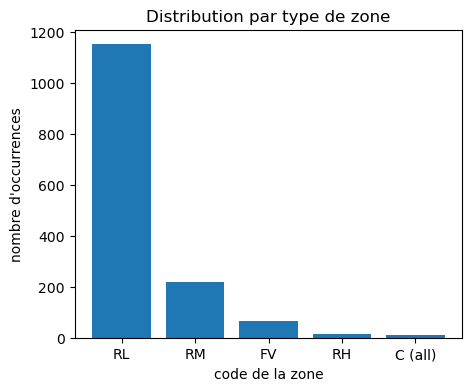

In [20]:
# On commence par créer une figure qui va accueillir notre graphique
# De manière optionnelle, on peut ici préciser sa taille
plt.figure(figsize=(5,4))

# On définit ensuite le type de représentation souhaitée en fonction des données
plt.bar(zone_count.index, zone_count.values)

# On ajoute des titres à nos figures et à nos axes x et y (optionnel mais conseillé)
plt.title("Distribution par type de zone")
plt.xlabel("code de la zone")
plt.ylabel("nombre d'occurrences")

# On peut si on veut enregistrer cette figure
plt.savefig("figures/MsZoning_barplot.png")

# On affiche notre graphe (optionnel sur les notebook)
plt.show()

## Figure avec un graphique comprenant plusieurs axes 

Il est fréquent qu'on veuille afficher plusieurs informations sur un même graphe
On cherche ici à mesurer l'écart entre la moyenne et la médiane.

In [21]:
# préparation des données

error_bar_data = df[["MSZoning", "SalePrice"]].groupby(by="MSZoning").agg(["mean","std"])
error_bar_data

# On peut ajouter une étape pour modifier les valeurs de MSZoning, on définit dans un premier temps un dictionnaire de mapping qu'on utilisera ensuite

map_dict={
       "A"  :	"Agriculture",
       "C (all)"	: "Commercial",
       "FV" :	"Floating Village Residential",
       "I"  :	"Industrial",
       "RH" :	"Residential High Density",
       "RL"	: "Residential Low Density",
       "RP"	: "Residential Low Density Park ",
       "RM"	: "Residential Medium Density"
}


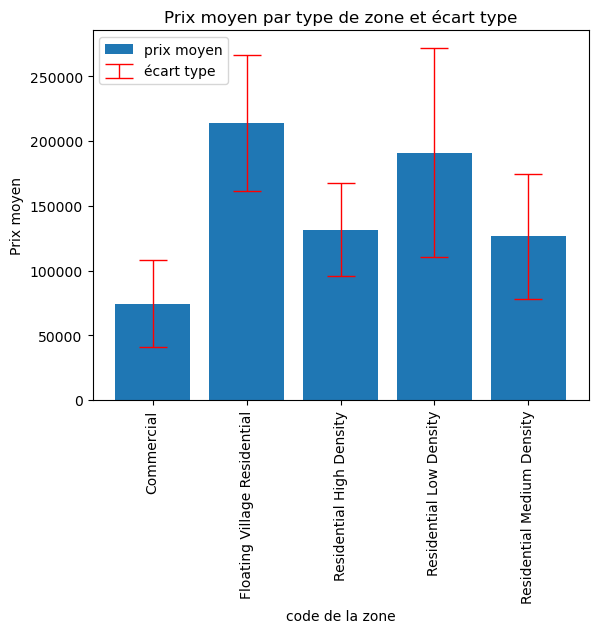

In [24]:
# On respecte ensuite les mêmes étapes
plt.figure()

# On définit ensuite l'ensemble des représentations qu'on inclure sur le graphique (ici on en a deux mais on peut en avoir autant qu'on veut)
plt.bar(error_bar_data.index, error_bar_data.SalePrice["mean"], label ="prix moyen")
plt.errorbar(error_bar_data.index, error_bar_data.SalePrice["mean"], error_bar_data.SalePrice["std"], fmt = 'none', 
            capsize = 10, ecolor = 'red', elinewidth = 1, capthick = 1,  label = "écart type")



# On ajoute des titres à nos figures et à nos axes (optionnel mais conseillé)
plt.title("Prix moyen par type de zone et écart type")
plt.xlabel("code de la zone")
plt.ylabel("Prix moyen")


# On peut complexifier à l'infini un graphique pour le rendre plus esthétique

# On renome ici les axes
# On commence par récupérer la location des "ticks" de l'axe x , un tick correspond à une case
locs, labels = plt.xticks()
# On modifie ensuite les labels de chaque tick à l'aide d'un dictionnaire
plt.xticks(ticks=locs, labels=error_bar_data.index.to_series().map(map_dict))
# On va réorienter notre axe x car les noms sont trop longs
plt.tick_params(axis='x',labelrotation=90)

# Comme ici on a deux graphes, il faut une légende pour les distinguer
plt.legend()

# On peut si on veut enregistrer cette figure
plt.savefig("figures/MsZoning_errorbarplot.png")

# On affiche notre graphe (optionnel sur les notebook)
plt.show()



# figure avec plusieurs graphes

Pour afficher plusieurs graphes sur une figure on va utiliser la fonction suivante:

**`plt.subplot(nb_lignes,nb_colonne,graphique_actuel)`**

Préparation des données

In [65]:
# On retire les valeurs extremes:
df = df.loc[df.SalePrice<500000,:]
df = df.loc[df.LotArea<50000,:]
color_map={
       "A"  :	"black",
       "C (all)"	: "blue",
       "FV" :	"grey",
       "I"  :	"purple",
       "RH" :	"yellow",
       "RL"	: "green",
       "RP"	: "orange",
       "RM"	: "red"
}
df["MSZoning_color"] = df["MSZoning"].map(color_map)


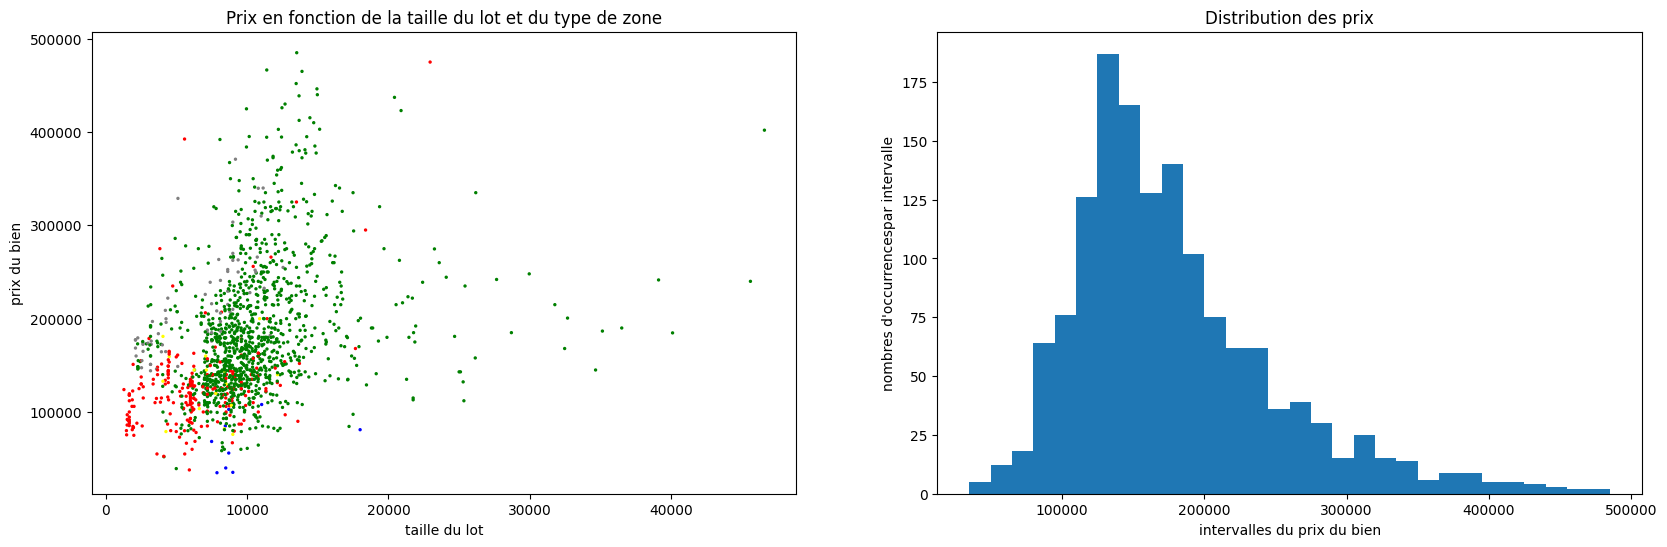

In [78]:
# On commence par déclarer une nouvelle figure
plt.figure(figsize=(20,6))

# On indique ensuite que notre figure comportera une ligne, deux colonnes, et qu'on travaille sur le premier graphe
plt.subplot(1,2,1)

# On crée ensuite notre figure
plt.scatter(x=df.LotArea, y =df.SalePrice, c=df.MSZoning_color, s=2)

# on ajoute les titres
plt.title("Prix en fonction de la taille du lot et du type de zone")
plt.xlabel("taille du lot")
plt.ylabel("prix du bien")

# On ajoute pas de légende car c'est compliqué avec matplot. On utilisera pour ça d'autres librairies

# On travaille maintenant sur le second graphe
plt.subplot(1,2,2)

# On crée ensuite notre figure
plt.hist(x=df.SalePrice, bins=30)

# on ajoute les titres
plt.title("Distribution des prix")
plt.xlabel("intervalles du prix du bien")
plt.ylabel("nombres d'occurrencespar intervalle")

plt.show()

# Matplotlib orienté objet

## Figure avec un graphique comprenant une seule représentation (exemple barplot)

Créer un graphique avec matplotlib nécessite de respecter certaines étapes:

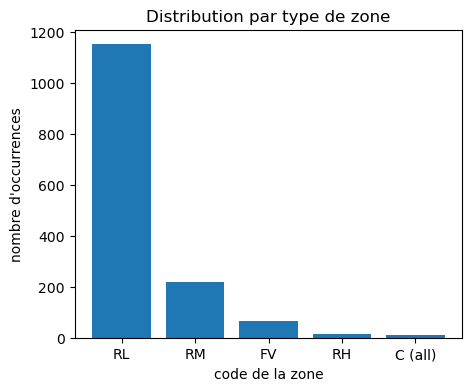

In [26]:
# On commence par instancier une figure et un axe.
# De manière optionnelle, on peut ici préciser sa taille
fig, ax = plt.subplots()
fig.set_size_inches(5,4)


# On définit ensuite le type de représentation souhaitée en fonction des données
ax.bar(zone_count.index, zone_count.values)

# On ajoute des titres à nos figures et à nos axes (optionnel mais conseillé)
ax.set_title("Distribution par type de zone")
ax.set_xlabel("code de la zone")
ax.set_ylabel("nombre d'occurrences")

# On peut si on veut enregistrer cette figure
plt.savefig("figures/MsZoning_barplot.png")

# On affiche notre graphe (optionnel sur les notebook)
plt.show()

## Figure avec un graphique comprenant plusieurs représentations de séries 

Il est fréquent qu'on veuille afficher plusieurs informations sur un même graphe
On cherche ici à mesurer l'écart entre la moyenne et la médiane.

In [ ]:
# préparation des données

error_bar_data = df[["MSZoning", "SalePrice"]].groupby(by="MSZoning").agg(["mean","std"])
error_bar_data

# On peut ajouter une étape pour modifier les valeurs de MSZoning, on définit dans un premier temps un dictionnaire de mapping qu'on utilisera ensuite

map_dict={
       "A"  :	"Agriculture",
       "C (all)"	: "Commercial",
       "FV" :	"Floating Village Residential",
       "I"  :	"Industrial",
       "RH" :	"Residential High Density",
       "RL"	: "Residential Low Density",
       "RP"	: "Residential Low Density Park ",
       "RM"	: "Residential Medium Density"
}


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_21671/3395126107.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=error_bar_data.index.to_series().map(map_dict), rotation = 90)


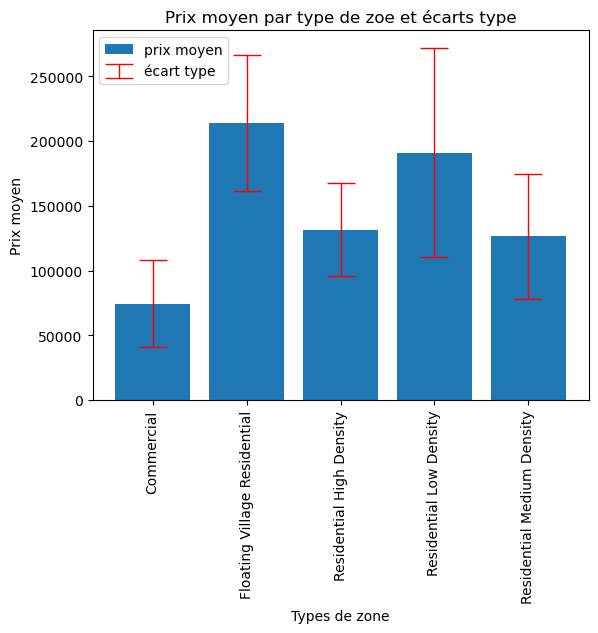

In [30]:



# On respecte ensuite les mêmes étapes
fig, ax = plt.subplots()



# On définit ensuite l'ensemble des représentations que l'on veut inclure sur le graphe (ici on en a deux mais on peut en avoir autant qu'on veut)

ax.bar(error_bar_data.index,error_bar_data.SalePrice["mean"], label ="prix moyen")
ax.errorbar(error_bar_data.index, error_bar_data.SalePrice["mean"], error_bar_data.SalePrice["std"], fmt = 'none', 
            capsize = 10, ecolor = 'red', elinewidth = 1, capthick = 1,  label = "écart type")

# On ajoute des titres à nos figures et à nos axes (optionnel mais conseillé)
ax.set_title("Prix moyen par type de zoe et écarts type")
ax.set_xlabel("Types de zone")
ax.set_ylabel("Prix moyen")

# On peut complexifier à l'infini un graphique pour le rendre plus esthétique


ax.set_xticklabels(labels=error_bar_data.index.to_series().map(map_dict), rotation = 90)


# Comme ici on a deux graphes, il faut une légende pour les distinguer
ax.legend()
# ax.grid()

# On peut si on veut enregistrer cette figure
plt.savefig("figures/MsZoning_errorbarplot.png")

# On affiche notre graphe (optionnel sur les notebook)
plt.show()




# figure avec plusieurs graphiques

Préparation des données

In [32]:
# On retire les valeurs extremes:
df = df.loc[df.SalePrice<500000,:]
df = df.loc[df.LotArea<50000,:]
color_map={
       "A"  :	"black",
       "C (all)"	: "blue",
       "FV" :	"grey",
       "I"  :	"purple",
       "RH" :	"yellow",
       "RL"	: "green",
       "RP"	: "orange",
       "RM"	: "red"
}
df["MSZoning_color"] = df["MSZoning"].map(color_map)


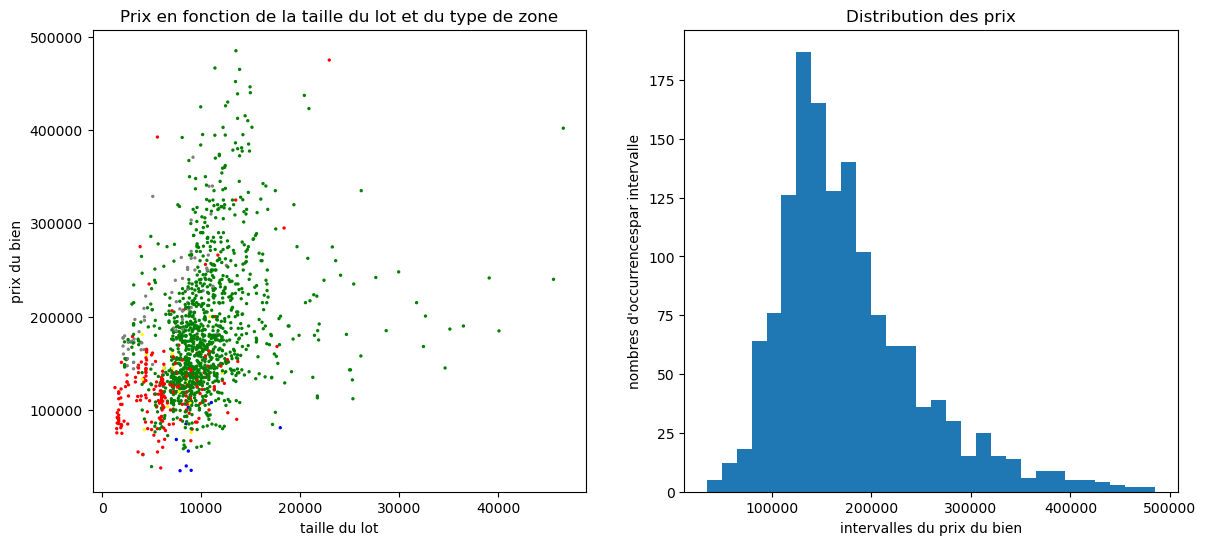

In [33]:
# On indique ensuite que notre figure comportera une ligne, deux colonnes, et qu'on travaille sur le premier graphe
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(14, 6)

# On crée ensuite notre figure
ax1.scatter(x=df.LotArea, y =df.SalePrice, c=df.MSZoning_color, s=2)

# on ajoute les titres
ax1.set_title("Prix en fonction de la taille du lot et du type de zone")
ax1.set_xlabel("taille du lot")
ax1.set_ylabel("prix du bien")


# On crée ensuite notre figure
ax2.hist(x=df.SalePrice, bins=30)

# on ajoute les titres
ax2.set_title("Distribution des prix")
ax2.set_xlabel("intervalles du prix du bien")
ax2.set_ylabel("nombres d'occurrencespar intervalle")

plt.show()




# Matplotlib intégré à pandas

Matplotlib est directemet intégré dans pandas, ainsi l'objet dataframe possède la méthode [plot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) qui permet de faire des graphiques simples

<AxesSubplot:title={'center':'distribution de MSZoning'}>

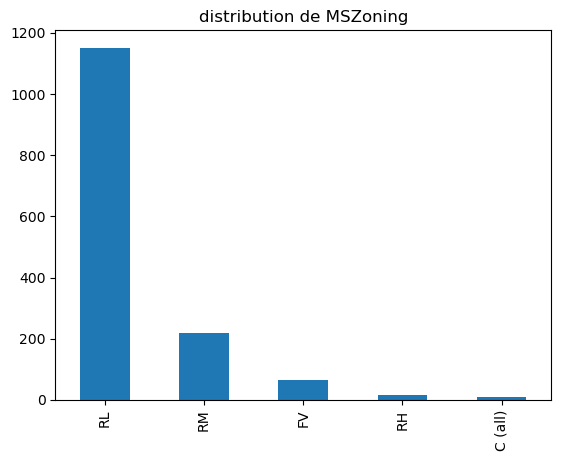

In [13]:
df.MSZoning.value_counts().plot(kind="bar", title="distribution de MSZoning")